In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
pd.options.mode.chained_assignment = None

Реализуем класс для загрузки данных из файла

In [87]:
class DataLoader:
    def __init__(self, url):
        self.url = url
    
    def get_data(self):
        self.df = pd.read_csv(self.url)
        return self.df

Реализуем класс для вывода топ регионов по строительству

In [163]:
class TopReg:
    def __init__(self, df): #сгруппируем датафрейм по регионам
        self.df = df
        self.df_reg = self.df.groupby(df['region']).size()
        self.df_reg = self.df_reg.to_frame(name='Count').reset_index(drop=False)

    def reg_edit(self): #подгрузим таблицу с номерами регионов и изменим в датафрейме цифровое обозначение на текстовое
        self.url = 'https://xn--b1agvbfco4a5df.xn--p1ai/kodirf.html'
        self.tab = pd.read_html(self.url)
        self.sub = self.tab[1]
        self.sub = self.sub[['Наименование субъекта РФ', 'Код субъекта']].drop(85)
        self.sub.set_index('Код субъекта', inplace=True)
        self.sub_dict = self.sub.to_dict()['Наименование субъекта РФ']
        for self.i in range(1, 10):
            self.sub_dict[str(self.i)] = self.sub_dict.pop(f'0{self.i}')
        self.sub_dict['93'] = 'Краснодарский край'
        for self.i in range(86):
            self.reg = self.sub_dict[str(self.df_reg.loc[self.i, 'region'])]
            self.df_reg.loc[self.i, 'region'] = self.reg
        self.df_reg.loc[22, 'Count'] = 1105
        self.df_reg = self.df_reg.drop(85)
        
    def get_topreg(self): #получим топ-10 регионов 
        self.df_reg = self.df_reg.sort_values(by = 'Count', ascending=False)
        self.df_reg10 = self.df_reg.head(10)
        self.df_reg10 = self.df_reg10.set_index('region')
        return self.df_reg10

In [170]:
class Developer:
    def __init__(self, df):
        self.df = df
        self.df_dev = self.df[['developer.developerGroupName', 'soldOutPerc']]
        self.df_dev = self.df_dev.dropna()
        self.df_dev = self.df_dev.groupby(['developer.developerGroupName']).agg(['count', 'mean'])
        self.df_dev.columns.droplevel(0)
        self.df_dev.columns = self.df_dev.columns.droplevel(0)
        self.df_dev = self.df_dev.sort_values('count', ascending=False)
        self.df_dev = self.df_dev.head(10)
        
    def get_dev(self):
        return self.df_dev

In [205]:
class Year:
    def __init__(self, df):
        self.df = df
        self.df['objReady100PercDt'] = pd.to_datetime(self.df['objReady100PercDt'])
        self.df = self.df[['id', 'objReady100PercDt']]
        self.df['objReady100PercDt'] = df['objReady100PercDt'].dt.year
        self.df = self.df.set_index('objReady100PercDt')
    
    def get_10year(self):
        self.df = self.df.groupby('objReady100PercDt').agg('count')
        self.df = self.df.query("2023 <= objReady100PercDt <= 2032")
        return self.df

In [224]:
class Visual:
    
    def plot(self, df):
        self.df = df
        self.df.sort_values('Count', ascending=True).plot(kind='barh', legend=False)
        plt.title('Топ-10 регионов по строительству')
        plt.xlabel('Количество объектов')
        plt.ylabel('Регион')
        plt.show()
        
    def pie(self, df):
        self.df = df
        plt.pie(self.df['count'], labels=self.df.index, autopct='%1.1f%%')
        plt.title("Доля девелоперов")
        plt.show()
        
    def plot_ready(self, df):
        self.df = df
        del self.df['count']
        self.df['mean'] = self.df['mean'] * 100
        self.df.plot(kind='barh', legend=False)
        plt.title('Готовность объектов')
        plt.xlabel('Процент готовности')
        plt.ylabel('Девелопер')
        plt.show()
        
    def plot_year(self, df):
        self.df = df
        self.df['objReady100PercDt'] = pd.to_datetime(self.df['objReady100PercDt'])
        self.df = self.df[['id', 'objReady100PercDt']]
        self.df['objReady100PercDt'] = df['objReady100PercDt'].dt.year
        self.df = self.df.set_index('objReady100PercDt')
        self.df = self.df.groupby('objReady100PercDt').agg('count')
        self.df.plot(legend=False)
        plt.title('Сдача объектов по годам')
        plt.xlabel('Год сдачи')
        plt.ylabel('Количество объектов')
        plt.show()

In [159]:
class_df = DataLoader('D:\DS\DS school\objects.csv')

Получим данные и выберем нужные нам

In [160]:
df = class_df.get_data()
df = df[['id', 'region', 'address', 'objElemLivingCnt', 'objReady100PercDt', 'wallMaterialShortDesc', 
              'objElemParkingCnt', 'objSquareLiving', 'objLkClassDesc', 'objFloorCnt', 'objFlatSq', 'objTransferPlanDt',
             'soldOutPerc','objPriceAvg', 'infrastructureIndexValue', 'developer.developerGroupName']]
df.head()

,id,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objElemParkingCnt,objSquareLiving,objLkClassDesc,objFloorCnt,objFlatSq,objTransferPlanDt,soldOutPerc,objPriceAvg,infrastructureIndexValue,developer.developerGroupName
0,13391,72,"г Тюмень, ул Профсоюзная, д. 56",44,2023-12-31,Другое,41,4343.90,Элитный,12,4343.90,28-02-2024 12:00,0.520845,62638.0,10.0,2МЕН ГРУПП ДЕВЕЛОПМЕНТ
1,13383,72,"г Тюмень, ул Профсоюзная, д. 56",68,2023-12-31,Другое,36,6423.85,Элитный,20,6423.85,28-02-2024 12:00,0.565622,66773.0,10.0,2МЕН ГРУПП ДЕВЕЛОПМЕНТ
2,13398,72,"г Тюмень, ул Профсоюзная, д. 56",43,2024-12-31,Другое,0,4812.98,Элитный,10,4812.98,28-02-2025 12:00,1.000000,47886.0,10.0,2МЕН ГРУПП ДЕВЕЛОПМЕНТ
3,13397,72,"г Тюмень, ул Профсоюзная, д. 56",65,2024-12-31,Другое,0,6251.10,Элитный,12,6251.10,28-02-2025 12:00,0.999984,47163.0,10.0,2МЕН ГРУПП ДЕВЕЛОПМЕНТ
4,10891,35,"г Вологда, ул Медуницинская, д. 11",225,2023-12-31,Панель,0,12847.23,Комфорт,17,12847.23,31-12-2023 12:00,1.000000,47684.0,9.0,ВологдаАгрострой


In [192]:
class_reg = TopReg(df)
class_reg.reg_edit()
df_reg = class_reg.get_topreg()
df_reg

,Count
region,
Краснодарский край,1105
Москва,886
Московская область,710
Новосибирская область,611
Санкт-Петербург,560
Свердловская область,400
Ленинградская область,364
Приморский край,362
Республика Татарстан,354


In [193]:
class_dev = Developer(df)
df_dev = class_dev.get_dev()
df_dev

,count,mean
developer.developerGroupName,,
ПИК,244,0.513376
Самолет,230,0.366061
DOGMA,149,0.181824
ЮгСтройИнвест,95,0.448833
ЛСР,86,0.552512
Холдинг Setl Group,70,0.570497
Эталон,53,0.413867
КОМОССТРОЙ,53,0.486378
ТОЧНО,51,0.377618


In [229]:
class_year = Year(df)
df_year = class_year.get_10year()
df_year

,id
objReady100PercDt,
2023,1213
2024,4513
2025,3714
2026,1487
2027,465
2028,196
2029,29
2030,18
2031,18


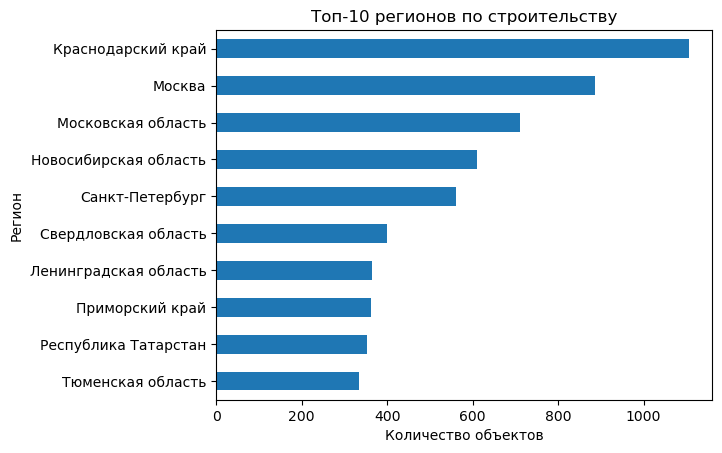

In [194]:
class_top10visual = Visual()
class_top10visual.plot(df_reg)

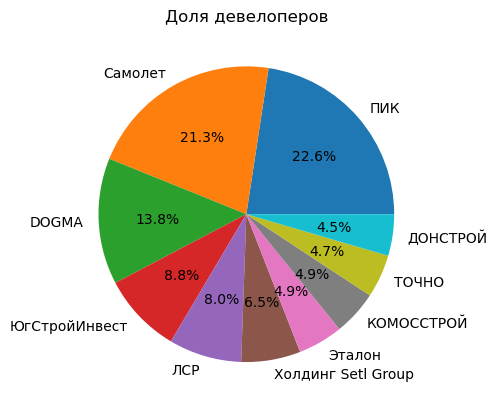

In [195]:
class_dev_pie = Visual()
class_dev_pie.pie(df_dev)

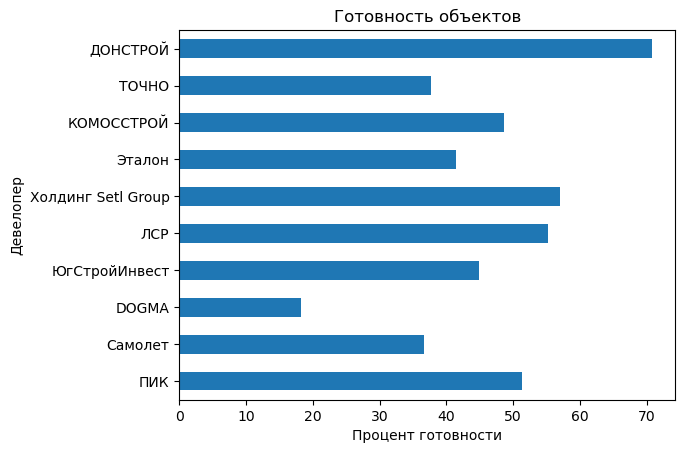

In [198]:
class_dev_ready = Visual()
class_dev_ready.plot_ready(df_dev)

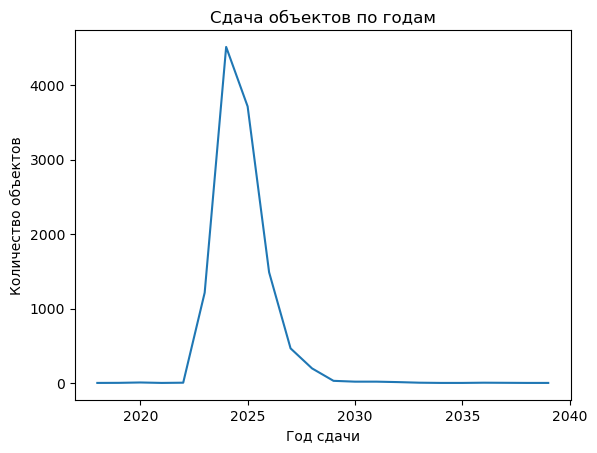

In [230]:
class_year = Visual()
class_year.plot_year(df)